In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from IPython.display import Math, Latex, SVG

from IPython.core.display import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import seaborn as sns

sns.set(color_codes=True)
sns.set(style="ticks", palette="muted")

rnd = np.random.RandomState(7)

# Bernoulli Distribution

- Only 2 outcomes, success or failure
- a single trial. 

$f(k; p) = p^k(1-p)^k$ for $k \in {0, 1}$

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

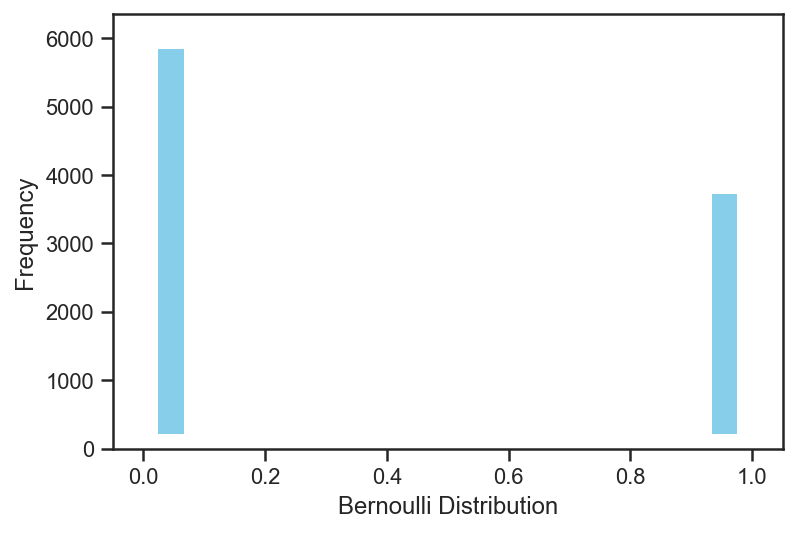

In [8]:
from scipy.stats import bernoulli, beta
data_bern = bernoulli.rvs(size=10000, p=0.4)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# Bernoulli Multi-armed Bandit

![mab](diagrams/mab.png)

- Parameters on each machine are unknown
- Only way to estimate what the parameters is to choose a machine
- What strategy to maximize wins?

In [9]:
class Bandit(object):
    """Multi-armed bandit"""
    
    def __init__(self, parameters):
        self.parameters = parameters
        self.N = len(parameters)
        self.S = np.zeros(self.N, dtype=np.int)
        self.F = np.zeros(self.N, dtype=np.int)
        
    def pull(self, machine):
                
        # draw uniform random sample
        p = rnd.random_sample()
        if p < self.parameters[machine]:
            self.S[machine] += 1
        else:
            self.F[machine] += 1
            
    def solve(self, strategy, n_trials):
        for i in range(n_trials):
            machine = strategy(self)
            self.pull(machine)


In [21]:
def plot_beliefs(fig, e, samples=1000):
    data = [np.random.beta(x+1, y+1, samples) for x, y, in zip(e.S, e.F)]
    for i in range(e.N):
        ax = sns.distplot(data[i],
                         bins=20,
                         kde=True,
                         label='Machine {}'.format(i),
                         )
    ax.set_xlim([0,1.0])
    ax.set(xlabel='Machine belief', ylabel='Frequency')
    ax.legend()

In [22]:
def greedy(e):
    probs = np.zeros(e.N)
    for i in range(e.N):
        probs[i] = (e.S[i] + 1)/(e.F[i] + 1)
    
    return np.argmax(probs)

In [23]:
p = [0.2, 0.4, 0.7]
b = Bandit(p)

In [25]:
fig = plt.figure()

for i in range(10):
    machine = greedy(b)
    b.pull(machine)
    plot_beliefs(fig, b)

AttributeError: 'Figure' object has no attribute 'S'

<Figure size 432x288 with 0 Axes>